<a href="https://colab.research.google.com/github/GNuSeekK/ICTCOG/blob/main/4_08_%5B%EB%94%A5%EB%9F%AC%EB%8B%9D%5D_%EC%88%98%EC%B9%98%EB%AF%B8%EB%B6%84%EA%B3%BC_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미분
* 한 순간(한 순간이라는 개념을 구할 수가 없으니까 **매우 작은 변화에서**)의 변화량(**기울기**)를 구하는 것
* 변화량($h$)이 0일 때를 순간이라고 할 텐데, 변화량이 0일 때는 기울기를 구할 수가 없기 때문에
* 변화량 : $\frac{y의변화량}{x의변화량}$
------------
$x$한 순간($x$에 대해 매우 작은 변화가 일어났을 때)의 변화량
$$
\frac{df(x)}{dx} = \lim_{h \to 0}\frac{f(x+h)-f(x)}{(x+h)-x} = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}
$$

In [ ]:
import numpy as np

In [ ]:
# 미분의 나쁜 구현
def numerical_diff(f, x):
  '''
    f : 미분 대상 함수
    x : x인 순간의 기울기를 구하기 위함
  '''

  # 순간을 구하기 위해서 h를 0으로 설정하는 것이 아닌, 0에 아주 가까운 숫자로 설정
  #  1. 수학적으로 분모는 0이 올 수 없다.
  #  2. 의미적 으로도 변화량을 구하는 것이 때문에 0에 무한히 가깝게 하는 것이지, 0은 아님

  h = 1e-50 # 소숫점 자리수가 50자리 -> 0.0000.......000001 
  return (f(x+h) - f(x)) / h

In [ ]:
numerical_diff(lambda x : 0.01*x**2+0.1*x, 5)

0.0

기울기를 구했는데 `0.0`이 나오는 이유는?

너무나 작은 숫자로 나눗셈을 하게 되면, 컴퓨터 시스템상 부동소수점 오류가 발생한다.( 반올림 오차 )

* 소수점 어느 특정 지점 부터는 계산이 불가
* `0.000000000...0000000000001`를 0.0으로 인식

In [ ]:
np.float32(1e-50)

0.0

In [ ]:
1 / np.float32(1e-50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


inf

# 전방차분과 중앙차분을 이용한 미분
$$
\frac{df(x)}{dx} = \lim_{h \to 0}\frac{f(x+h)-f(x-h)}{x+h-(x-h)} = \lim_{h \to 0}\frac{f(x+h)-f(x-h)}{2h}
$$

In [ ]:
# 향상된 미분 함수
def numerical_diff(f, x):
  h = 1e-4 # 0.0001이 가장 적당하다고 알려져 있다.
  return (f(x+h) - f(x-h)) / (2*h)

실제 $x$를 집어 넣고 **미분을 계산하는 것을 수치미분**이라고 한다.

# 수치미분의 예시
$$
f(x) = y = 0.01x^2+0.1x
$$

In [ ]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 6)

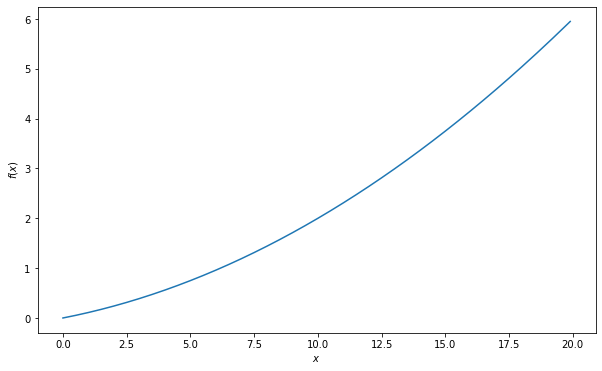

In [ ]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel(f"$x$")
plt.ylabel(f"$f(x)$")
plt.plot(x, y)
plt.show()

In [ ]:
print("x가 5일 때의 미분값 : {:.1f}".format(numerical_diff(function_1, 5)))
print("x가 10일 때의 미분값 : {:.1f}".format(numerical_diff(function_1, 10)))

x가 5일 때의 미분값 : 0.2
x가 10일 때의 미분값 : 0.3


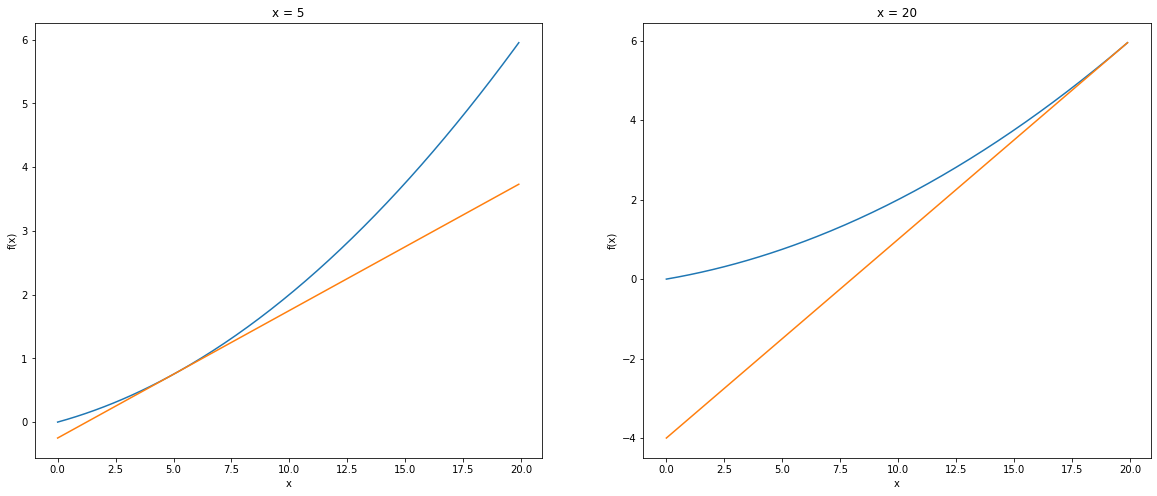

In [ ]:
# 미분값을 이용한 접선 시각화
def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

fig, axes = plt.subplots(1,2, figsize=(20,8))

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

axes[0].plot(x, y)
axes[0].plot(x, y2)
axes[0].set_title("x = 5")

axes[1].set_xlabel("x")
axes[1].set_ylabel("f(x)")

tf = tangent_line(function_1, 20)
y2 = tf(x)

axes[1].plot(x, y)
axes[1].plot(x, y2)
axes[1].set_title("x = 20")
plt.show()

# 편미분
* 위의 예시에서는 $x$(인수 - `parameter`)가 1개
* 2개 이상의 인수에 대한 미분을 **편미분**이라고 한다.
* 한 쪽만 미분 하는 것
  * 여러 개의 인수 중 하나만 미분 하는 것

$$
  f(x_0, x_1) = x_0^2+x_1^2
$$


In [ ]:
# x를 배열로 생각하자
def function_2(x):
  return x[0]**2 + x[1]**2
  # return np.sum(x**2)

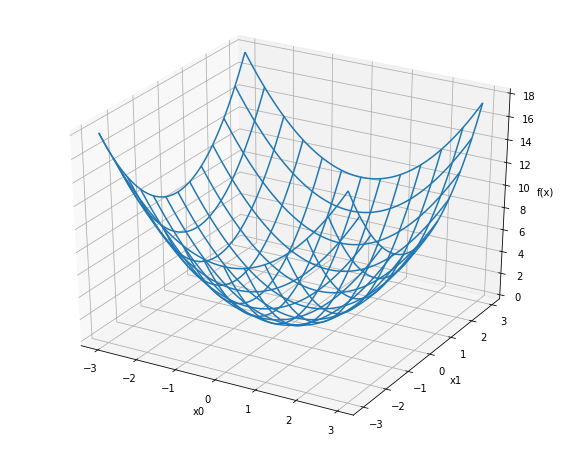

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

X0 = np.arange(-3, 3, 0.05)
X1 = np.arange(-3, 3, 0.05)

X0, X1 = np.meshgrid(X0, X1)
Z = function_2([X0,X1])

ax.plot_wireframe(X=X0, Y=X1, Z=Z,rstride=10, cstride=10)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('f(x)')
plt.show()


$$
  f(x_0, x_1) = x_0^2+x_1^2
$$


## 문제 1
$x_0=3, x_1=4$ 일 때, $x_0$에 대한 편미분 $\frac{\partial f}{\partial x_0}$을 구하시오. 

In [ ]:
def function_tmp1(x0):
  return x0**2 + 4.0**2

print("{:.1f}".format(numerical_diff(function_tmp1, 3.0)))

6.0


## 문제 2
$x_0=3, x_1=4$ 일 때, $x_1$에 대한 편미분 $\frac{\partial f}{\partial x_1}$을 구하시오. 

In [ ]:
def function_tmp2(x1):
  return 3.0**2 + x1**2

print("{:.1f}".format(numerical_diff(function_tmp2, 4.0)))

8.0


# 기울기 배열(gradients)
* $x_0$에 대한 미분값(기울기), $x_1$에 대한 미분값을 따로 구해서 확인
  * $x_0 = 3, x_1=4$일 때의 미분을 각각 구함
  * $\frac{\partial f}{\partial x_0}$, $\frac{\partial f}{\partial x_1}$ 각각 구해봄
* 각 방향($x_0$ 방향, $x_1$ 방향) 기울기를 하나로 묶어서 **벡터화** 시킨다.
  * 우리는 $\left( \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1} \right )$를 구하면 방향과 크기를 알 수 있는 벡터로 표현이 가능하다.
* 이를 기울기 벡터라 한다.

In [ ]:
# 수치미분을 이용한 기울기 구하기
#  기울기 배열을 구하는 과정
def numerical_gradient(f, x):
    '''
    f : 기울기를 구할 대상 함수
    x : 기울기를 구할 값(좌표)
    '''
    h = 1e-4

    # 기울기 배열
    #  grad의 shape은 항상 x와 똑같아야 한다.
    grad = np.zeros_like(x) # x와 shape이 같은 0으로 채워진 배열 생성

    for idx in range(x.size):
        # 각 x에 대한 편미분을 수행
        tmp_val = float(x[idx]) # 미분 대상 값 가져오기

        # f(x+h)계산
        x[idx] = tmp_val + h # tmp_val에 아주 약간 증가 시킨 x값을 넣는다
                             # 예시) 1. tmp_val = x0
                             #       2. x =[idx] = tmp_val+h
                             #             x = [x0+h, x1]

        fxh1 = f(x) # x0에 h가 더해진 채로 미분 값 구하기

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val # 해당 위치의 인덱스에 원래 값 집어 넣기

    return grad


여러 좌표별로 $x_0^2 + x_1^2$의 기울기 구하기 

In [ ]:
x = np.array([3.0, 4.0])
print(f'x = [{x[0]}, {x[1]}]일 때의 기울기 배열 : {numerical_gradient(function_2,x)}')

x = np.array([1.0, 2.0])
print(f'x = [{x[0]}, {x[1]}]일 때의 기울기 배열 : {numerical_gradient(function_2,x)}')

x = np.array([1.0, 1.0])
print(f'x = [{x[0]}, {x[1]}]일 때의 기울기 배열 : {numerical_gradient(function_2,x)}')

x = [3.0, 4.0]일 때의 기울기 배열 : [6. 8.]
x = [1.0, 2.0]일 때의 기울기 배열 : [2. 4.]
x = [1.0, 1.0]일 때의 기울기 배열 : [2. 2.]


x의 좌표값이 작아질 수록 기울기 값도 낮아지는 것을 확인

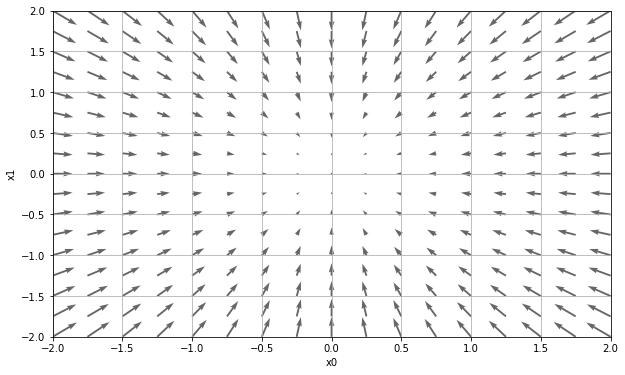

In [ ]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

* $\left ( \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1} \right ) $을 묶어서 벡터로 표현
  * 최소 지점(기울기가 0인 지점), 위 함수에서는 [0,0]으로 가기 위한 $x_0$의 방향과 크기, $x_1$의 방향과 크기

# ⭐⭐⭐⭐⭐경사하강법⭐⭐⭐⭐⭐
* 기울기를 줄여나가면서 어떠한 함수 $f$의 최소지점을 알아내는 방식
* 최초 임의의 지점에서 시작해서 일정 거리만큼 이동하면서 기울기를 수정(갱신)
    * 함수의 값이 최소지점이 되는 방향으로 일정 거리만큼 움직인다.

## 경사하강법의 원리
1. 현 위치에서 기울어진 방향으로 일정 거리만큼 이동
  * 갱신 되는 위치(좌표)가 일정한게 아니고, 미분 값을 보고 갱신해야 할 수치를 일정하게 **조정**
  * 학습률 ( **learning rate $\eta$** )이라고 한다.
2. 이동한 곳에서도 미분을 통해 기울기를 구하고, 기울기를 구한 방향으로 값이 갱신된다.
3. 이 과정을 최솟점을 찾을 때까지 반복

**경사하강법 수식**

$$
x_0 = x_0 - \eta \frac{\partial f}{\partial x_0}
$$

$$
x_1 = x_1 - \eta \frac{\partial f}{\partial x_1}
$$

* $\eta$ : Learning Rate ( 하이퍼 파라미터 )

In [ ]:
# 경사하강법 구현
#  f : 경사하강법을 수행할 함수
#  init_x : x의 최초 지점
#  lr : learning_rate 미분 값을 얼마나 반영해서 학습할 것인가?
#  step_num : 경사하강법 수행 횟수
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    # 1. 기울기 배열 구하기
    grads = numerical_gradient(f, x)
    print("좌표 : {} / 기울기 : {}".format(x, grads))

    # 2. 기울기 배열을 구했으면 경사하강법을 이용해서 좌표를 갱신
    x = x - lr*grads

  # 갱신된 좌표 얻어내기
  return x

$$f(x_0,x_1) = x_0^2 + x_1^2$$


In [ ]:
start_x = np.array([-3.0, 4.0])
gradient_descent(function_2, start_x, lr=0.1)

좌표 : [-3.  4.] / 기울기 : [-6.  8.]
좌표 : [-2.4  3.2] / 기울기 : [-4.8  6.4]
좌표 : [-1.92  2.56] / 기울기 : [-3.84  5.12]
좌표 : [-1.536  2.048] / 기울기 : [-3.072  4.096]
좌표 : [-1.2288  1.6384] / 기울기 : [-2.4576  3.2768]
좌표 : [-0.98304  1.31072] / 기울기 : [-1.96608  2.62144]
좌표 : [-0.786432  1.048576] / 기울기 : [-1.572864  2.097152]
좌표 : [-0.6291456  0.8388608] / 기울기 : [-1.2582912  1.6777216]
좌표 : [-0.50331648  0.67108864] / 기울기 : [-1.00663296  1.34217728]
좌표 : [-0.40265318  0.53687091] / 기울기 : [-0.80530637  1.07374182]
좌표 : [-0.32212255  0.42949673] / 기울기 : [-0.64424509  0.85899346]
좌표 : [-0.25769804  0.34359738] / 기울기 : [-0.51539608  0.68719477]
좌표 : [-0.20615843  0.27487791] / 기울기 : [-0.41231686  0.54975581]
좌표 : [-0.16492674  0.21990233] / 기울기 : [-0.32985349  0.43980465]
좌표 : [-0.1319414   0.17592186] / 기울기 : [-0.26388279  0.35184372]
좌표 : [-0.10555312  0.14073749] / 기울기 : [-0.21110623  0.28147498]
좌표 : [-0.08444249  0.11258999] / 기울기 : [-0.16888499  0.22517998]
좌표 : [-0.06755399  0.09007199] / 기울기 : 

array([-6.11110793e-10,  8.14814391e-10])

경사하강법 시각화

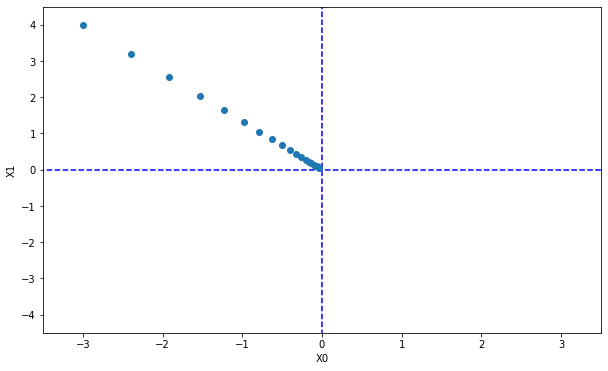

In [ ]:
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

**학습률이 너무 크다면?** $\eta$ : 10

In [ ]:
start_x = np.array([-3.0, 4.0])

# history : 경사하강법을 이용한 갱신과정을 기록한 리스트 - 시각화에 사용
result, history = gradient_descent(function_2, start_x, lr=10.0)
print('learning rate 10.0 : {}'.format(result))

learning rate 10.0 : [-2.58983747e+13 -1.29524862e+12]


학습률이 너무 크면 발산

In [ ]:
# 학습률이 너무 작은 예
start_x = np.array([-3.0, 4.0])
result, history = gradient_descent(function_2, start_x, lr=1e-10)
print('learning rate 1e-10 : {}'.format(result))

learning rate 1e-10 : [-2.99999994  3.99999992]


거의 갱신이 되지 않는 것을 확인! - 너무 작으면 최소지점으로 가지 못하고 갱신이 끝남!

# 신경망에서의 Gradient Descent
* **손실값(Loss)**을 최소로 하는 모델 파라미터를 **구하는 과정**
  * 이 과정을 **최적화(Optimization)**
  * 신경망에서의 모델 파라미터는?
    * **가중치(W)와 편향!(b)**
* Loss를 최소화 하기위한 가중치와 편향을 구하는 과정을 **최적화**라고 한다.
* 경사하강법은 여러 가지 최적화 기법의 일종

**신경망의 학습이란?**
* Loss($L$)값을 최소화 시키는 가중치($W$)와 편향($b$)를 구한다.
* $\frac{\partial L}{\partial W}$ : 가중치 W가 변화하면 L은 얼마나 변화할 것인가
* $\frac{\partial L}{\partial b}$ : 편향 b가 변화하면 L은 얼마나 변화할 것인가

$$
W = \begin{pmatrix} w_{11} & w_{21} & w_{31} \\ w_{12}&w_{22}&w_{32} \\\end{pmatrix}, b = \left (b_1, b_2, b_3 \right )
$$

가중치와 편향에 대한 기울기 표현

$$
\frac{\partial L}{\partial W}=\begin{pmatrix} \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{31}} \\ \frac{\partial L}{\partial w_{12}}&\frac{\partial L}{\partial w_{22}}&\frac{\partial L}{\partial w_{32}} \\\end{pmatrix}, \frac{\partial L}{\partial b} = \left (\frac{\partial L}{\partial b_1}, \frac{\partial L}{\partial b_2}, \frac{\partial L}{\partial b_3} \right )
$$


**가중치 W, 편향 b를 갱신하기 위한 경사하강법**
$$
W = W - \eta \frac{\partial L}{\partial W}, b = b - \eta \frac{\partial L}{\partial b}, 
$$

In [ ]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 
    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        it.iternext()   
    return grad

# SimpleNet 만들기
* 입력을 두개 받는 $[x_1, x_2]$ 3개의 뉴런을 가진 신경망
* 편향 고려 x. 편향이 없다고 생각함. 오로지 가중치 W만 사용

In [ ]:
# 신경망 클래스
class SimpleNet:
    # 초기화 (생성자에서는..?)
    # 신경망이 초기에 가지고 있어야 할 매개변수를 셋팅
    # 신경망이 매개변수 초기화 작업을 생성자인 __init__ 메소드에서 수행

    def __init__(self):

        # 매개변수 초기화 방법

        # 1) 정규분포 랜덤 * 0.01 사용
        # 2) 카이밍 히 초깃값 (He 초기값) - ReLU 함수를 활성화 함수로 사용 했을 때 보통 사용하는 방식
        # 3) 사비에르 글로로트 초깃값 (Xavier, Glorot 초깃값) - Sigmoid를 Activation 으로 썻을 때 주로 사용
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return x @ self.W # 행렬의 내적만
    
    def loss(self, x, t):
        # 손실 (loss)을 구할 떄 필요한 것
        # 예측값(y), 정답(t), loss 함수(cross entorypy error)
        z = self.predict(x)
        y = softmax(z)

        loss = cross_entropy_error(y,t)
        return loss

SimpleNet 확인

In [ ]:
net = SimpleNet()
print(f'가중치 : \n{net.W}')

가중치 : 
[[-0.89958663  2.11571127 -0.19410916]
 [-0.51056668  2.13340823  1.5628576 ]]


In [ ]:
x = np.array([0.6, 0.9])
p = net.predict(x)

print('예측값 : {}'.format(p))

예측값 : [-0.99926199  3.18949417  1.29010635]


In [ ]:
# loss 구해보기
t = np.array([1, 0, 0]) # 정답
t_error = np.array([0,1,0]) # 오답

print('정답을 잘 예측 했을 때 Loss : {:.3f}'.format(net.loss(x,t)))
print('정답을 잘못 예측 했을 때 Loss : {:.3f}'.format(net.loss(x,t_error)))

정답을 잘 예측 했을 때 Loss : 4.341
정답을 잘못 예측 했을 때 Loss : 0.153


$$
\frac{\partial L}{\partial W}=\begin{pmatrix} \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{31}} \\ \frac{\partial L}{\partial w_{12}}&\frac{\partial L}{\partial w_{22}}&\frac{\partial L}{\partial w_{32}} \\\end{pmatrix}
$$

In [ ]:
# 1. Loss를 구하기 위한 함수
# 2. W에 대한 Loss를 구할 수 있는 함수
# dL / dW

# net.loss를 미분할 함수를 따로 만들어야 한다.
def f(W):
  return net.loss(x, t) # 함수의 모양을 하고있지만 함수가 아니다. Loss의 결과물.

# 혹은
# loss_W = lambda W : net.loss(x, t)

In [ ]:
# Loss를 구하는 함수 f에 대한 모든 W들의 기울기를 구할 수 있다.
dW = numerical_gradient(f, net.W)
print(dW)

[[-0.59218391  0.51509473  0.07708918]
 [-0.88827586  0.77264209  0.11563378]]


# 학습이 가능한 MNIST 신경망 구현
* 2층 신경망
* 1층 은닉층의 뉴런 개수 `100`개
    * 활성화 함수로 `sigmoid`
* 2층 출력층의 뉴런 개수 `10`개
    * 활성화 함수로 `softmax` 사용
* loss 함수는 `cross_entorypy_error`

---
* `predict`에서 `softmax` 사용할 것
* 클래스 내부에 기울기 배열을 구하는 `numerical_gradient_params`를 구현
* 경사하강법은 따로 구현할 예정!

In [ ]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        '''
            input_size : 입력 데이터의 개수
            hidden_size : 은닉층의 뉴런 개수
            output_size : 출력층의 뉴런 개수
            weight_init_std : 정규 분포 랜덤값에 표준편차 0.01을 적용하기 위함 (기울기 소실 방지)
                              층이 깊어지면 효과가 많이 떨어진다.
        '''
        self.params = {} # 매개변수가 등록될 dict
        # 1층 매개변수 : W1, b1
        # 2층 매개변수 : W2, b2

        # 가중치 : 정규 분포 랜덤으로 만들기
        # 편향 : 0으로 채워진 배열로 초기화

        # 1층 매개변수 초기화
        self.params['W1'] = np.random.randn(input_size, hidden_size) * weight_init_std
        self.params['b1'] = np.zeros(hidden_size)

        # 2층 매개변수 초기화
        self.params['W2'] = np.random.randn(hidden_size, output_size) * weight_init_std
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        # params에서 가중치, 편향을 꺼내오기
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']

        # 1층 출력층 계산
        z1 = x @ W1 + b1
        a1 = sigmoid(z1)

        # 2층 출력층 계산
        z2 = a1 @ W2 + b2
        y = softmax(z2)

        return y
    
    def loss(self, x, t):
        # predict를 호출해서 예측..
        y = self.predict(x)
        return cross_entropy_error(y,t)
    
    # 모든 매개변수들에 대한 기울기 구하기
    def numerical_gradient_params(self, x, t):
        # 각 층에서 기울기를 저장할 딕셔너리
        # 저장할 것 : 각 매개변수의 기울기들(W1, W2, b1, b2)을 저장
        # 나중에 이 기울기로 경사하강법 수행
        grads = {}

        print('----------미분 시작----------')
        loss_param_f = lambda p : self.loss(x,t) # loss_param_f : 각종 모델 파라미터에 대한 loss의 미분값을 구해줄 함수
        
        # 1층 매개변수에 대한 기울기 구하기 : loss에 대한 W1, b1의 기울기를 grads 저장
        grads['W1'] = numerical_gradient(loss_param_f, self.params['W1']) # dL / dW1
        grads['b1'] = numerical_gradient(loss_param_f, self.params['b1']) # dL / db1

        # 2층 매개변수에 대한 기울기 구하기 : loss에 대한 W2, b2의 기울기를 grads에 저장
        grads['W2'] = numerical_gradient(loss_param_f, self.params['W2']) # dL / dW2
        grads['b2'] = numerical_gradient(loss_param_f, self.params['b2']) # dL / db2
        print('----------미분 종료----------')

        return grads

1. 미분을 한다
2. 어떤 변수의 기울기를 구한다. 
3. 신경망의 변수인 W, b의 기울기를 구한다 
4. 기울기를 구하면 어떠한 함수($Loss$)의 최소 지점으로 가는 방향과 크기를 알 수 있다. 
5. 이렇게 구해낸 기울기로 경사하강법, adam 등의 최적화 기법을 수행해서 $Loss$를 최소화 할 수 있는 W, b를 얻어낼 수 있다

# MNIST 데이터 불러오기 및 전처리

In [ ]:
from tensorflow.keras import datasets
mnist = datasets.mnist

(X_train, t_train), (X_test, t_test) = mnist.load_data()

X_train.shape, t_train.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

## 데이터 전처리
* `t_train, t_test` : One Hot Encoding (안해도 되지만 함)
* `X_train, X_test` : (N, 28 * 28) 형태로 평탄화 시키기, `255.0`으로 나눠서 데이터 정규화 처리하기

In [ ]:
import tensorflow as tf

t_train_one_hot = tf.one_hot(t_train, 10).numpy()
t_test_one_hot = tf.one_hot(t_test,10).numpy()

t_train_one_hot.shape, t_test_one_hot.shape

((60000, 10), (10000, 10))

In [ ]:
# X_train, X_test 평탄화 시키기
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## 이미지 데이터 정규화
* 이미지 데이터는 항상 0~255 사이의 정수값을 기본
* 0부터 255라는 숫자의 차이는 매우 큰 데이터 끼리의 차이이기 때문에 0~1 사이로 정규화
* 255.0 으로 나눠서 최소를 0으로, 최대를 1로 갖는 이미지로 만들어 주기

In [ ]:
X_train = X_train / 255.0
X_test  = X_test / 255.0

# 훈련을 하기 위한 하이퍼 파라미터 설정하기
* 미니 배치 개수 선정(`batch_size`)
* 훈련 반복 횟수 설정 - 경사하강법 적용 횟수
* 학습률 선정

In [ ]:
# 반복 횟수
iter_nums = 10000

# 미니 배치 설정
train_size = X_train.shape[0] # 60000개의 데이터 중에
batch_size = 100 # batch_size개 만큼의 데이터를 무작위로 선정(np.random.choice 사용)

# 학습률
learning_rate = 0.1

In [ ]:
# 신경망 만들기
net = TwoLayerNet(input_size = 28*28, hidden_size = 100, output_size = 10)

In [ ]:
# 반복문 돌릴 때 진행 상황 프로그래스 바로 시각화 해서 보기
from tqdm import tqdm_notebook

for i in tqdm_notebook(range(iter_nums)):
    # 1. 미니 배치 만들기
    batch_mask = np.random.choice(train_size, batch_size)

    X_batch = X_train[batch_mask] # feature 가져오기
    t_batch = t_train[batch_mask] # label 가져오기

    # 2. 각 매개변수의 기울기 배열 구하기 (미분 수행)
    # 기울기를 알아야 경사하강법(최적화)을 수행 가능

    grads = net.numerical_gradient_params(X_batch, t_batch) # 예측 - 손실 - 미분

    # 기울기를 구했으면 경사하강법 수행하기
    keys = ['W1', 'W2', 'b1', 'b2']

    # 경사하강법
    for key in keys:
        # 경사하강법 공식 참고
        net.params[key] = net.params[key] - (learning_rate * grads[key])

    # 갱신된 loss 확인
    loss = net.loss(X_batch, t_batch)
    print(f'step {i+1} -> Loss : {loss}')

# 시간 엄청 오래걸림. => 미분을 거의 8,000,000번 수행해야함 한번에

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


----------미분 시작----------


KeyboardInterrupt: ignored

In [ ]:
# 반복문 돌릴 때 진행 상황 프로그래스 바로 시각화 해서 보기
from tqdm import tqdm_notebook

for i in tqdm_notebook(range(iter_nums)):
    # 1. 미니 배치 만들기
    batch_mask = np.random.choice(train_size, batch_size)

    X_batch = X_train[batch_mask] # feature 가져오기
    t_batch = t_train[batch_mask] # label 가져오기
    
    print(batch_mask)
len(batch_mask)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


[35884 42978  1510 15703 50611 50907 10679 12661 51499 55090 10012 43851
 35462 32333 41914 57511 26476 46839  6422 11305 42471 54534  8425 48787
 29783 54183  5532 39005 53560 33064 41324 51174 49593   965  6142 58356
  2056 20181 44763 15423 46514 42221 37927 58780 55991 34823 55440 36295
 44955 11827  4516 25825 41212 52834 26413 29745 10601  7411   943 11301
 34458 25302 54872 43408 31719 23676 13179  9769 58960 13159 42135  8450
 21598 32522 39275  7654 52264 45492 12355  9085 28040 17129 29594 53638
  8243 57355 55174 52554 18035 53766 55411 55319 57835 29743 47259  1244
  4298 18098 31936 46956]
[42289 22084 12080 45091 18369  6440 14985 11079 33115 40571 59898 39153
 23994 20683 18324 34317 44047 23840 59115 24207 50188  1436 59480 50688
 56574 27658 46916 12138 51195 20004 20957 55488 36540 53398 54493 12491
 35695 28509 38432 21681  4685  8998 56935 35276 53670 46552 16138 57380
 39110  8920 53547 38008 34766 31401 43486 49786 24911 36911  9032  5675
 24736  1901 43639 17312 

100